<a href="https://colab.research.google.com/github/sfsy1/embrace-stress-monitoring/blob/master/face_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# using open source face_recognition library by Adam Geitgey
!git clone https://github.com/ageitgey/face_recognition.git
!pip install -r face_recognition/requirements.txt

In [0]:
from face_recognition import face_recognition as fr
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def crop(img, loc):
    # loc[xmin, ymax, xmax, ymin]
    img_cropped = img[loc[0]:loc[2], loc[3]:loc[1]]
    return img_cropped

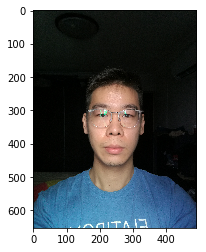

In [0]:
# load image
image = fr.load_image_file("test.jpg")
# scale image down
img = cv2.resize(image, None,fx=0.2,fy=0.2)
# show original image
plt.imshow(img);

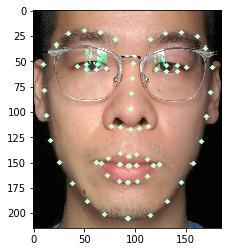

In [0]:
# # locate face
# face_locations = fr.face_locations(img)[0]

# locate landmark points
xs, ys = [], []

img_landmarks = img.copy()
face_landmarks_list = face_recognition.face_landmarks(img)
for feat in face_landmarks_list[0].keys():
    for (x, y) in face_landmarks_list[0][feat]:
        cv2.circle(img_landmarks, (x, y), 2, (200, 255, 210), -1, lineType=cv2.LINE_AA)
        xs.append(x)
        ys.append(y)

img_landmarks_cropped = crop(img_landmarks, [max(0,min(ys)-20), max(xs)+10, max(ys)+10, min(xs)-10])
img_cropped = crop(img, [max(0,min(ys)-20), max(xs)+10, max(ys)+10, min(xs)-10])
plt.imshow(img_landmarks_cropped);

In [0]:
# model credits to gitshanks
!git clone https://github.com/gitshanks/fer2013.git

Cloning into 'fer2013'...
remote: Enumerating objects: 152, done.
remote: Total 152 (delta 0), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (152/152), 22.46 MiB | 34.84 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
# keras model
json_file = open('fer2013/fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = keras.models.model_from_json(loaded_model_json)
model.load_weights("fer2013/fer.h5")

In [0]:
test = cv2.imread("liam.png")

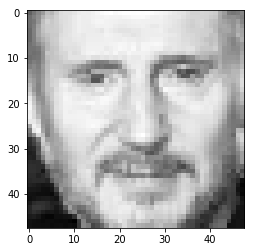

In [315]:
# resize and grayscale image
# face_input = cv2.resize(img_cropped, model.input_shape[1:3])
face_input = cv2.resize(test, model.input_shape[1:3])
face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2GRAY)
plt.imshow(face_input, cmap='gray');

In [0]:
result = model.predict(np.expand_dims(np.expand_dims(face_input,0),-1))

,Angry,Disgust,Fear,Happy,Sad,Surprise,Neutral
0,0.184591,0.009577,0.299452,0.129721,0.426422,0.102636,0.974812


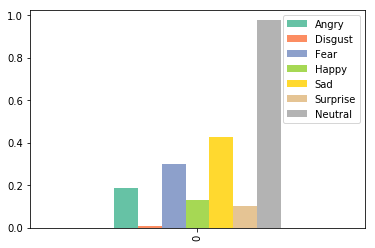

In [317]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
classes = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
result_pd = np.power(pd.DataFrame(result, columns=classes), 0.3)
result_pd.plot.bar(cmap='Set2');
result_pd

In [318]:
# angry, disgust, fear, happy, sad, surprise, neutral
coeff = np.array([3,3,4,-2,3,0,-1])
stress = ((result_pd.values * coeff).sum() + 3) / 10
stress

0.4825326770544052